In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
from fastai.vision import *

A classification problem
Let's begin with our sample of the MNIST dataset

In [2]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

In [3]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))

It's set up with an imagenet structure so we use it to load our training and validation datasets, then label, transform, convert them into ImageDataBunch and finally, normalize them.

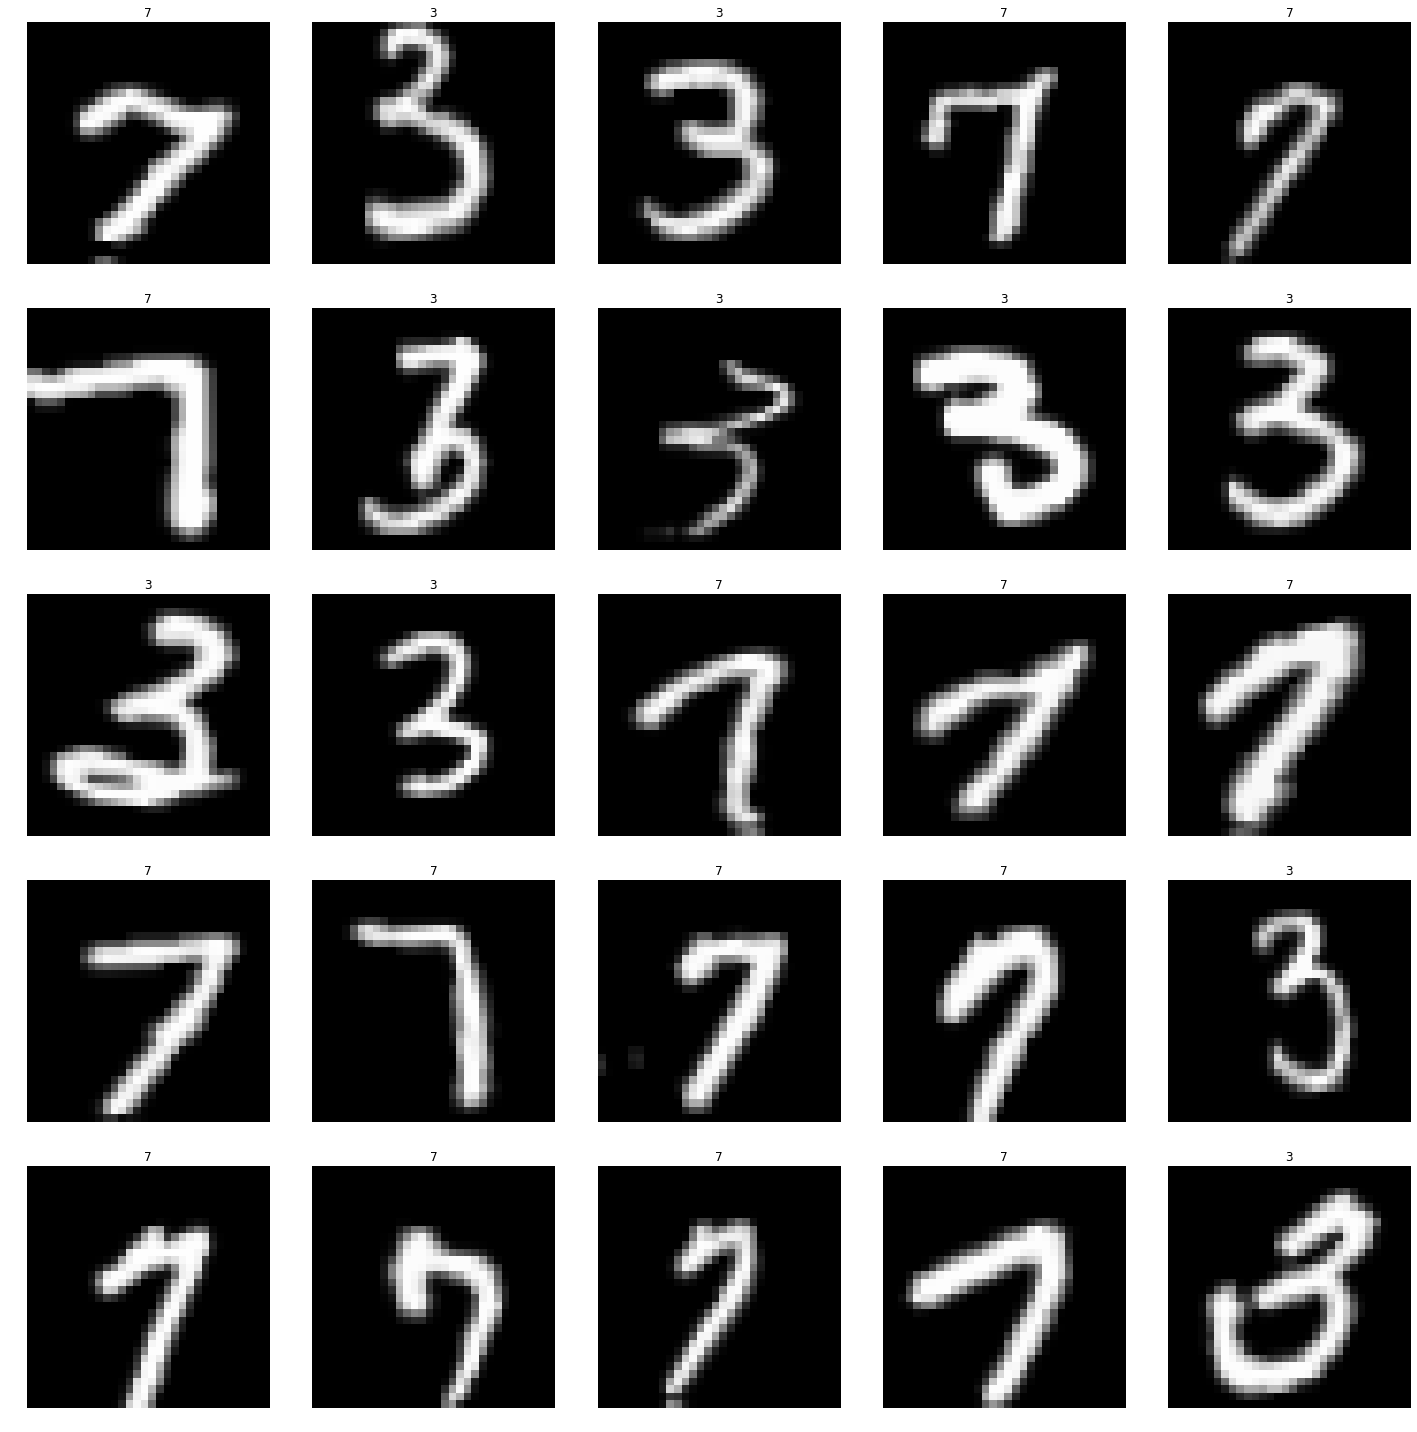

In [4]:
data.show_batch()

Once your data is properly set up in a DataBunch, we can call data.show_batch() to see what a sample of a batch looks like.

Note that the images were automatically de-normalized before being showed with their labels (inferred from the names of the folder). We can specify a number of rows if the default of 5 is too big, and we can also limit the size of the figure

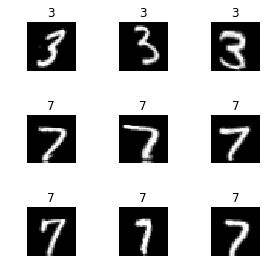

In [5]:
data.show_batch(rows=3, figsize=(4,4))

Now let's create a Learner object to train a classifier.

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 51436990.03it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.441922,0.218558,0.901288,00:05


Our model has quickly reached around 90% accuracy, now let's see its predictions on a sample of the validation set. For this, we use the show_results method.

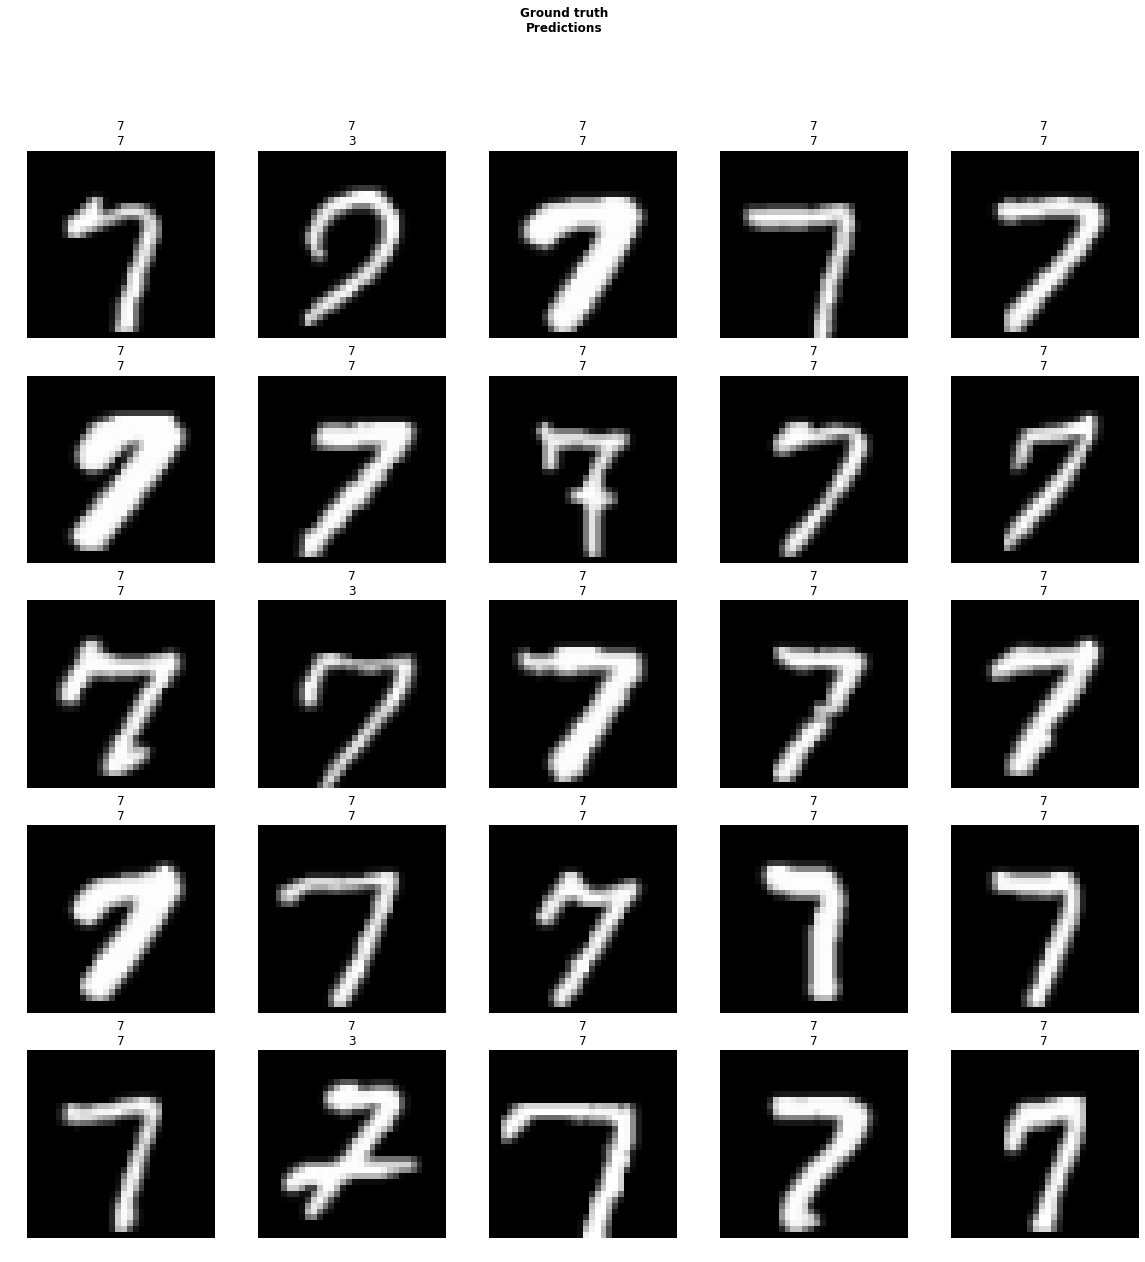

In [7]:
learn.show_results()

Since the validation set is usually sorted, we get only images belonging to the same class. We can then again specify a number of rows, a figure size, but also the dataset on which we want to make predictions

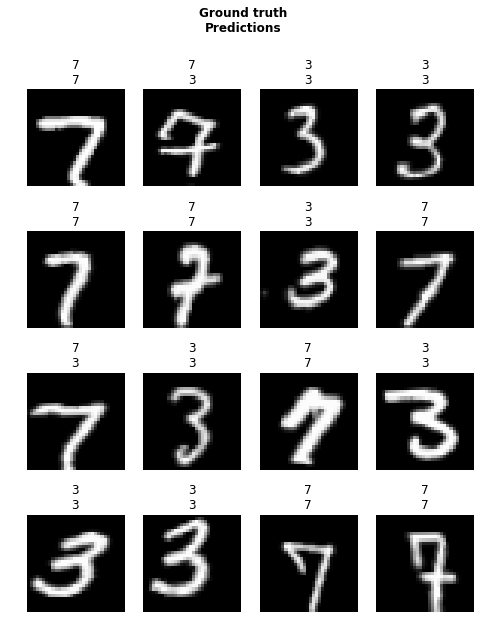

In [8]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))